In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from pathlib import Path

import cv2
import skimage as sk
import skimage.io as skio

%load_ext autoreload
%autoreload 2

In [2]:
from submission import *
from helper import *

In [13]:
pnp = np.load('../data/pnp.npz', allow_pickle=True)
X = pnp['X']
x = pnp['x']
im = pnp['image']
cad = pnp['cad']

X.shape, x.shape, im.shape

((30, 3), (30, 2), (333, 500, 3))

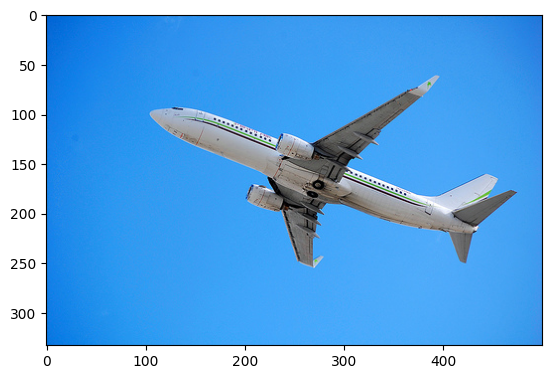

In [17]:
plt.imshow(im)

In [24]:
P = estimate_pose(x, X)
display(P.shape)
K, R, t = estimate_params(P)

K.shape, R.shape, t.shape

(3, 4)

((3, 3), (3, 3), (3,))

In [30]:
_x = P @ np.vstack((X.T, np.ones(X.shape[0])))
_x = _x / _x[-1, :]
_x = _x[:2, :].T
_x.shape

(30, 2)

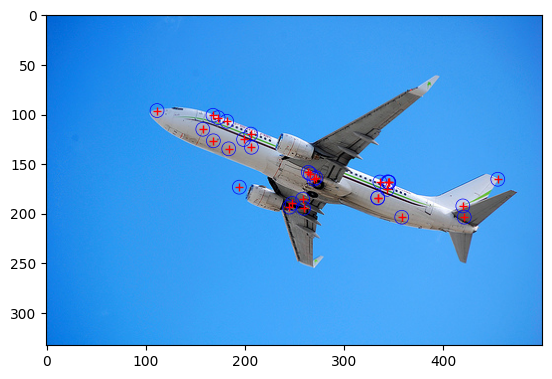

In [45]:
plt.imshow(im)
plt.plot(x.T[0], x.T[1], 'r+')
# make a circle for the 3D points
plt.scatter(_x.T[0], _x.T[1], s=100, facecolors='none', edgecolors='b', linewidths=0.5)

In [79]:
vertices = cad[0, 0][0]
display(vertices.shape)
proj_v = P @ np.vstack((vertices.T, np.ones(vertices.shape[0])))
proj_v = proj_v / proj_v[-1, :]
proj_v = proj_v[:2, :].T

proj_v.shape

(27392, 3)

(27392, 2)

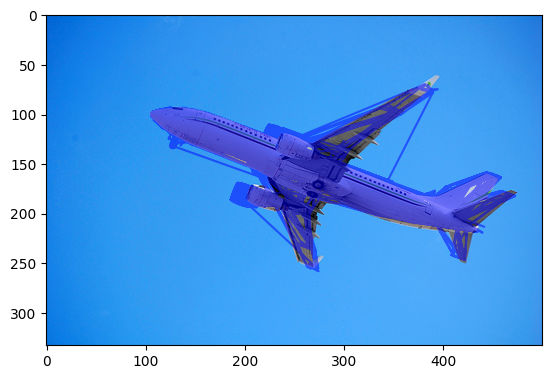

In [89]:
plt.imshow(im)
# reduce opacity of the lines
plt.plot(proj_v.T[0], proj_v.T[1], 'b-', alpha=0.5)